# Glaucoma Detection - Data Exploration

This notebook explores the datasets used for glaucoma detection, analyzing image characteristics and class distributions.

## Setup

In [2]:
# Setup environment
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2
from tqdm.notebook import tqdm
import glob

# Add project root to path
sys.path.append('..')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

## 1. Load Dataset Information

First, let's locate and analyze the available data directories.

In [12]:
# Define data directories
data_dirs = {
    'REFUGE': {
        'images': '../data/REFUGE/Images_Square',
        'masks': '../data/REFUGE/Masks_Square'
    },
    'ORIGA': {
        'images': '../data/ORIGA/Images_Square',
        'masks': '../data/ORIGA/Masks_Square'
    },
    'G1020': {
        'images': '../data/G1020/Images_Square',
        'masks': '../data/G1020/Masks_Square'
    }
}

# Check which datasets are available
available_datasets = []
for dataset_name, paths in data_dirs.items():
    if os.path.exists(paths['images']) and os.path.exists(paths['masks']):
        available_datasets.append(dataset_name)
        print(f"✅ {dataset_name} dataset is available")
    else:
        print(f"❌ {dataset_name} dataset is not available")

print(f"\nFound {len(available_datasets)} available datasets: {', '.join(available_datasets)}")

✅ REFUGE dataset is available
✅ ORIGA dataset is available
✅ G1020 dataset is available

Found 3 available datasets: REFUGE, ORIGA, G1020


## 2. Analyze Dataset Sizes

In [15]:
dataset_stats = {}

for dataset_name in available_datasets:
    img_dir = data_dirs[dataset_name]['images']
    mask_dir = data_dirs[dataset_name]['masks']
    
    # Get image and mask files
    image_files = glob.glob(os.path.join(img_dir, "*.jpg")) + glob.glob(os.path.join(img_dir, "*.png"))
    mask_files = glob.glob(os.path.join(mask_dir, "*.png"))
    
    # Count files
    dataset_stats[dataset_name] = {
        'num_images': len(image_files),
        'num_masks': len(mask_files),
        'image_dir': img_dir,
        'mask_dir': mask_dir,
        'image_files': image_files,
        'mask_files': mask_files
    }
    
    print(f"{dataset_name} dataset:\n - {len(image_files)} images\n - {len(mask_files)} masks")

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Dataset': [name for name in dataset_stats.keys()],
    'Images': [stats['num_images'] for name, stats in dataset_stats.items()],
    'Masks': [stats['num_masks'] for name, stats in dataset_stats.items()]
})

# Add total row
total_row = pd.DataFrame({
    'Dataset': ['Total'],
    'Images': [summary_df['Images'].sum()],
    'Masks': [summary_df['Masks'].sum()]
})
summary_df = pd.concat([summary_df, total_row])

summary_df

REFUGE dataset:
 - 1200 images
 - 1200 masks
ORIGA dataset:
 - 650 images
 - 650 masks
G1020 dataset:
 - 1020 images
 - 1020 masks


,Dataset,Images,Masks
0,REFUGE,1200,1200
1,ORIGA,650,650
2,G1020,1020,1020
0,Total,2870,2870


## 3. Visualize Sample Images and Masks

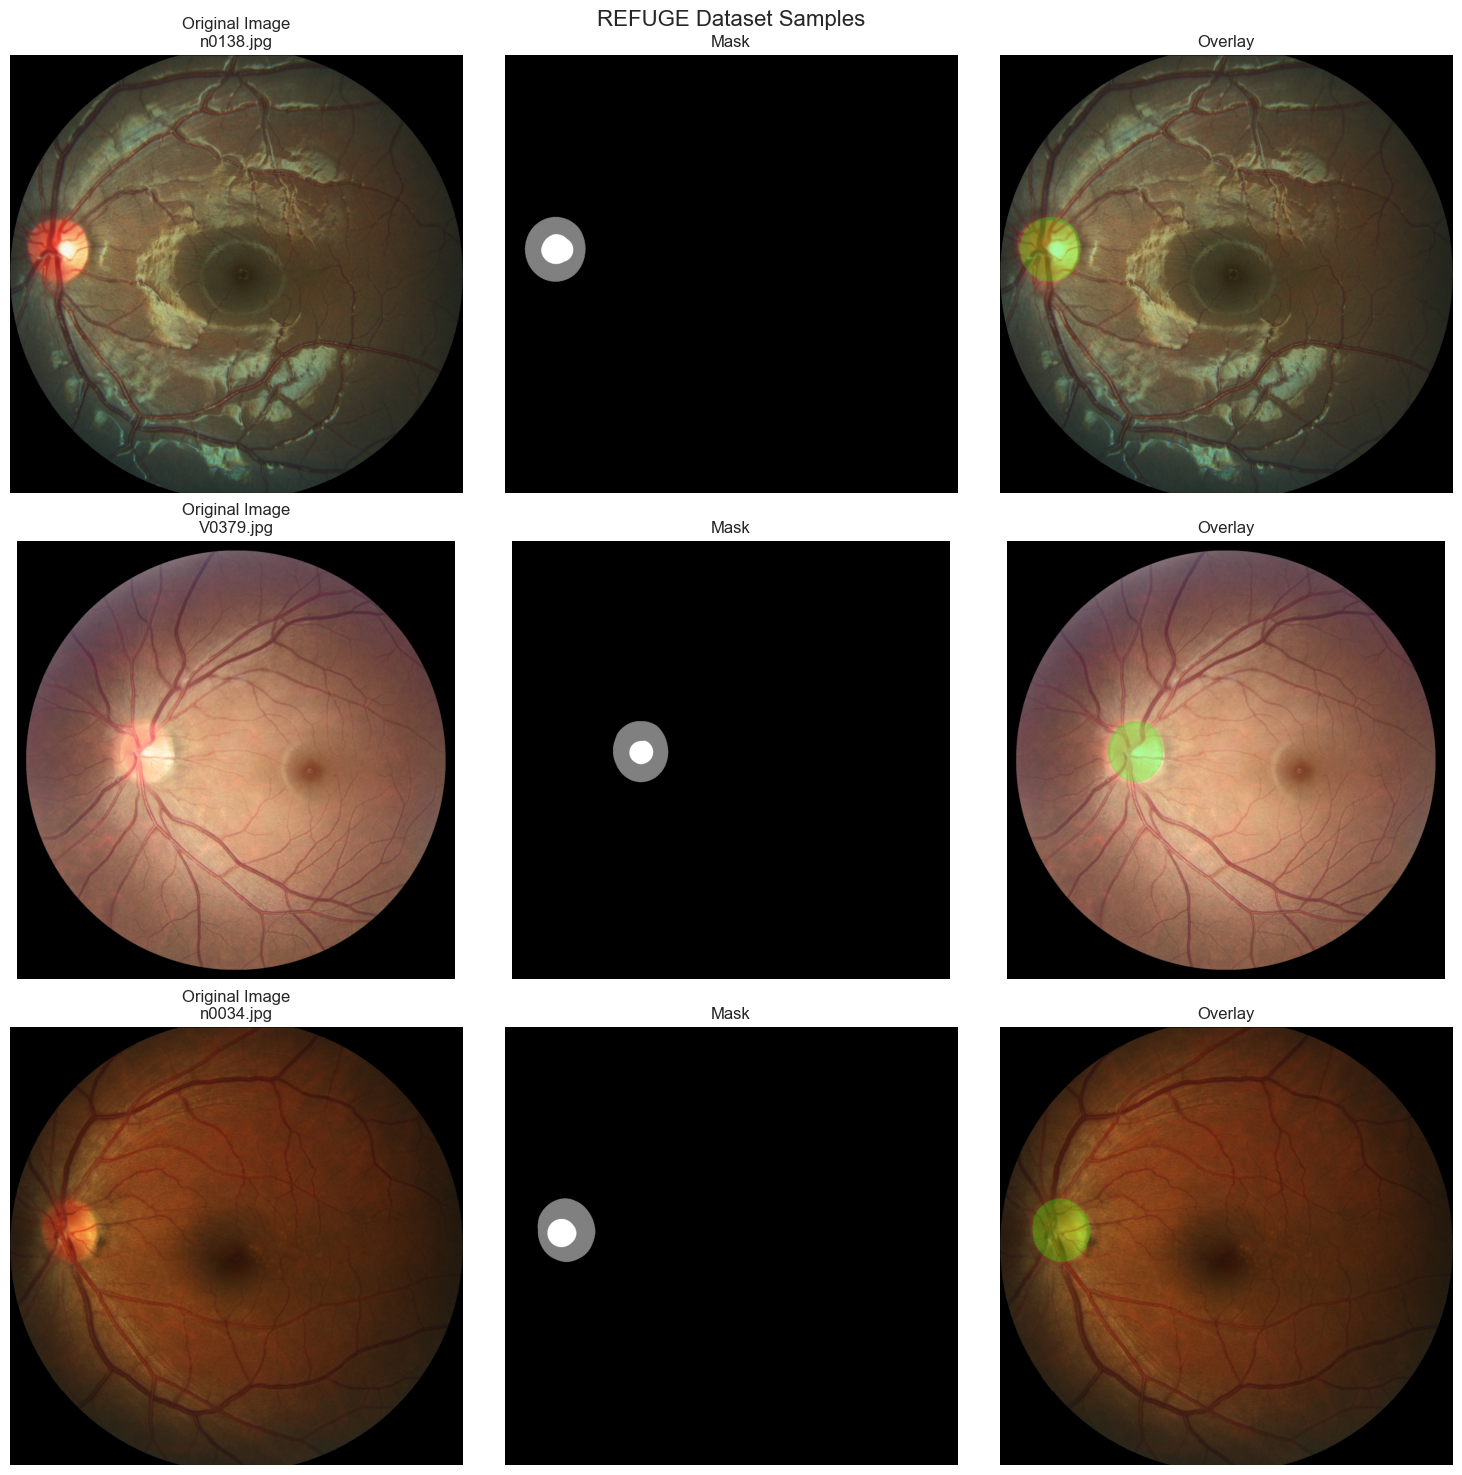

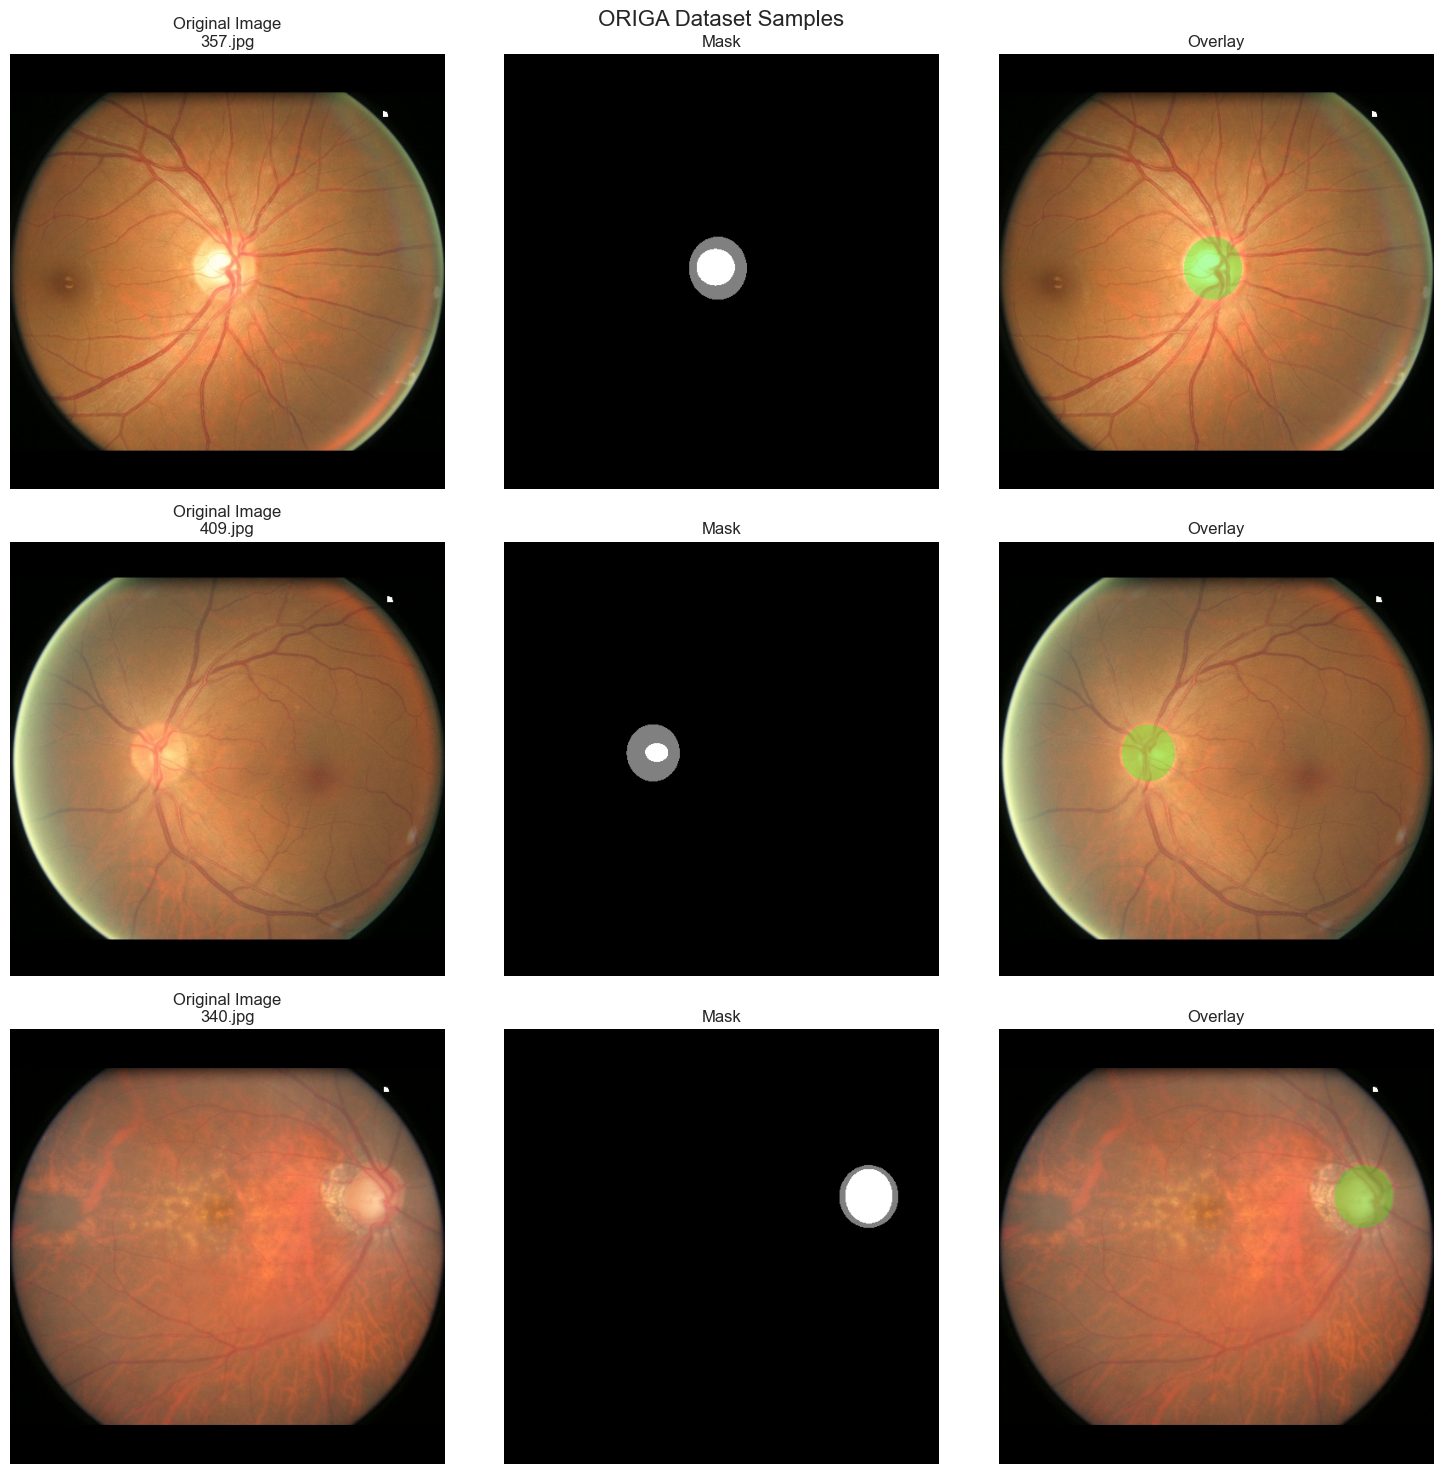

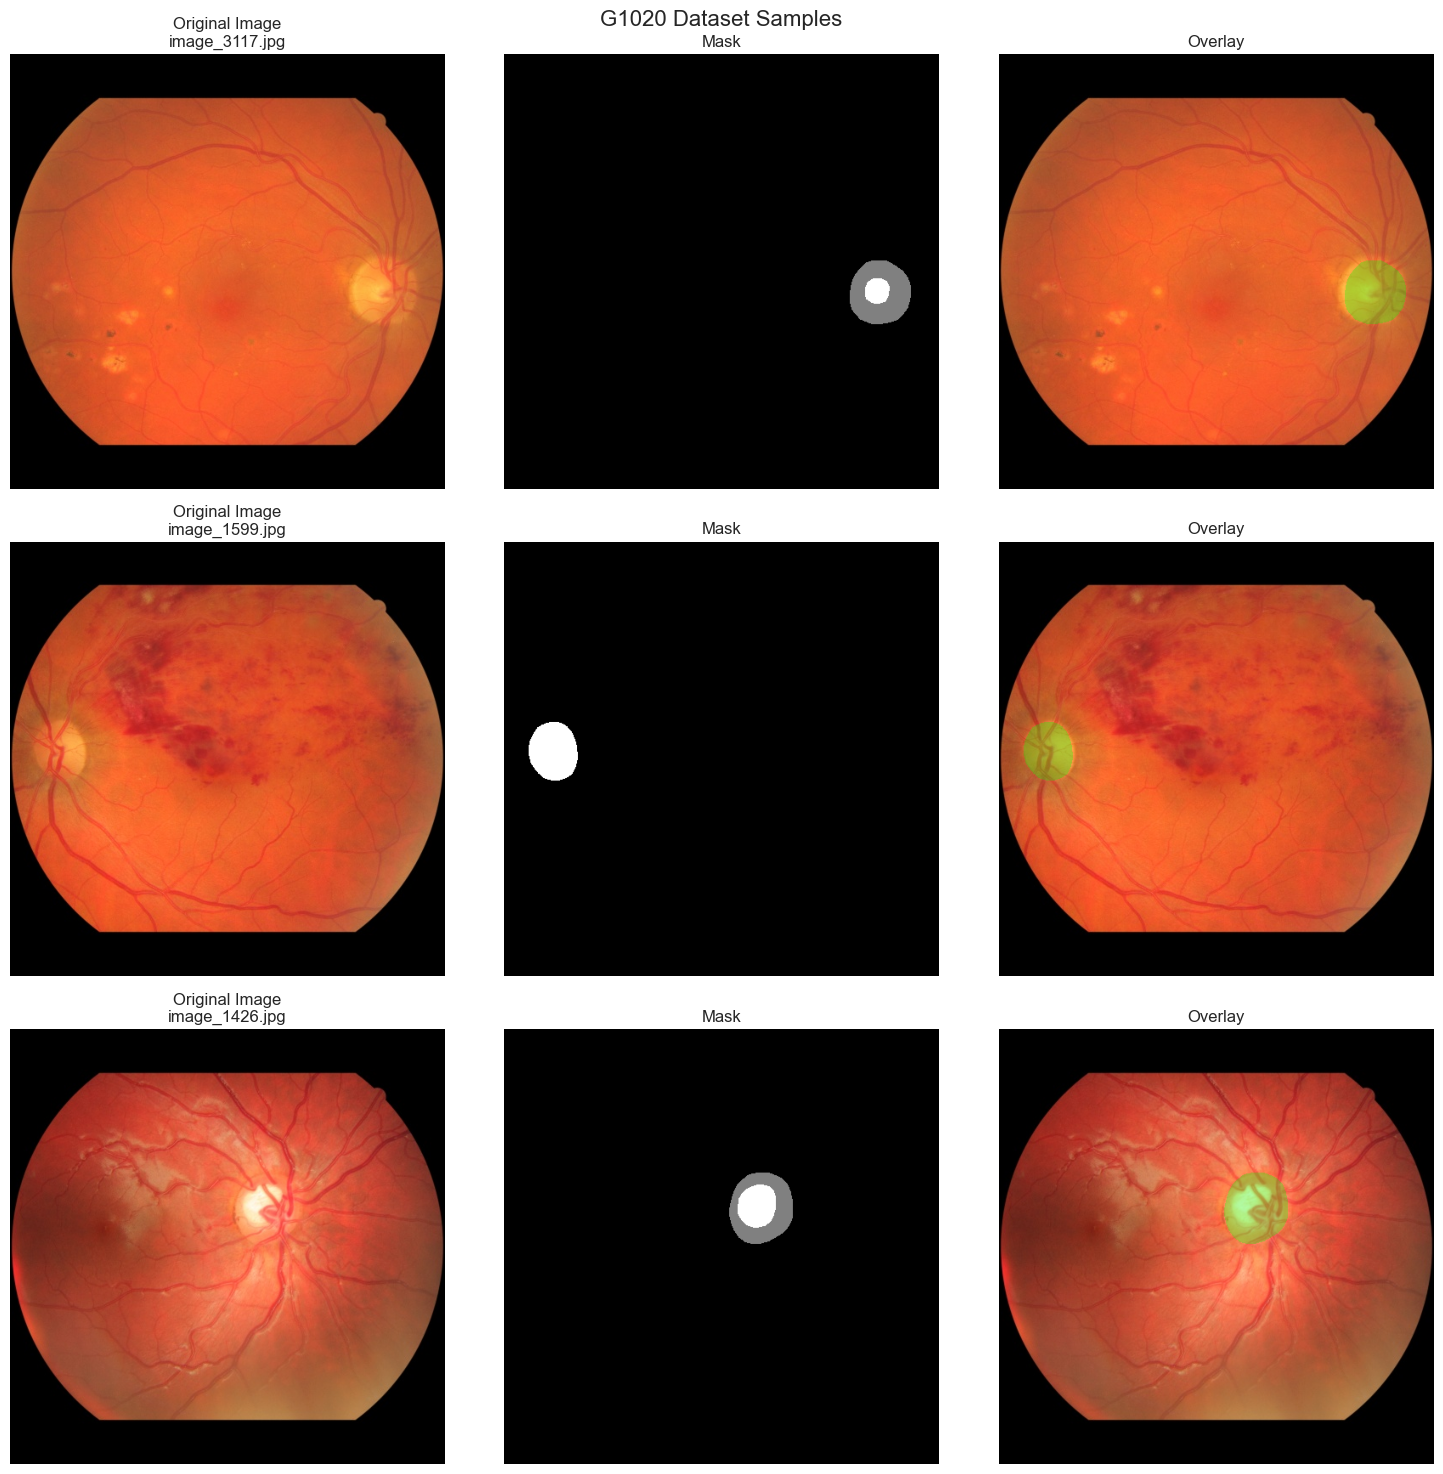

In [17]:
def visualize_samples(dataset_name, num_samples=3):
    """Visualize random samples from a dataset."""
    if dataset_name not in dataset_stats:
        print(f"Dataset {dataset_name} not available")
        return
    
    stats = dataset_stats[dataset_name]
    num_samples = min(num_samples, len(stats['image_files']))
    
    # Select random samples
    indices = np.random.choice(len(stats['image_files']), num_samples, replace=False)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))
    
    for i, idx in enumerate(indices):
        img_path = stats['image_files'][idx]
        mask_path = stats['mask_files'][idx] if idx < len(stats['mask_files']) else None
        
        # Load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Load mask if available
        if mask_path and os.path.exists(mask_path):
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            
            # Create overlay
            overlay = img.copy()
            overlay[mask > 0] = [0, 255, 0]  # Green for mask
            overlay = cv2.addWeighted(img, 0.7, overlay, 0.3, 0)
        else:
            mask = np.zeros_like(img[:, :, 0])
            overlay = img.copy()
        
        # Plot images
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Original Image\n{os.path.basename(img_path)}")
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(mask, cmap='gray')
        axes[i, 1].set_title("Mask")
        axes[i, 1].axis('off')
        
        axes[i, 2].imshow(overlay)
        axes[i, 2].set_title("Overlay")
        axes[i, 2].axis('off')
    
    plt.suptitle(f"{dataset_name} Dataset Samples", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Visualize samples from each available dataset
for dataset_name in available_datasets:
    visualize_samples(dataset_name)

## 4. Analyze Mask Distributions

Analyzing REFUGE masks:   0%|          | 0/100 [00:00<?, ?it/s]

REFUGE Mask Statistics:
 - Mean mask size: 54704.5 pixels
 - Mean mask ratio: 0.0171 (1.71%)
 - Median mask ratio: 0.0171 (1.71%)
 - Std dev mask ratio: 0.0028


Analyzing ORIGA masks:   0%|          | 0/100 [00:00<?, ?it/s]

ORIGA Mask Statistics:
 - Mean mask size: 4166.3 pixels
 - Mean mask ratio: 0.0159 (1.59%)
 - Median mask ratio: 0.0156 (1.56%)
 - Std dev mask ratio: 0.0031


Analyzing G1020 masks:   0%|          | 0/100 [00:00<?, ?it/s]

G1020 Mask Statistics:
 - Mean mask size: 4059.0 pixels
 - Mean mask ratio: 0.0155 (1.55%)
 - Median mask ratio: 0.0154 (1.54%)
 - Std dev mask ratio: 0.0031


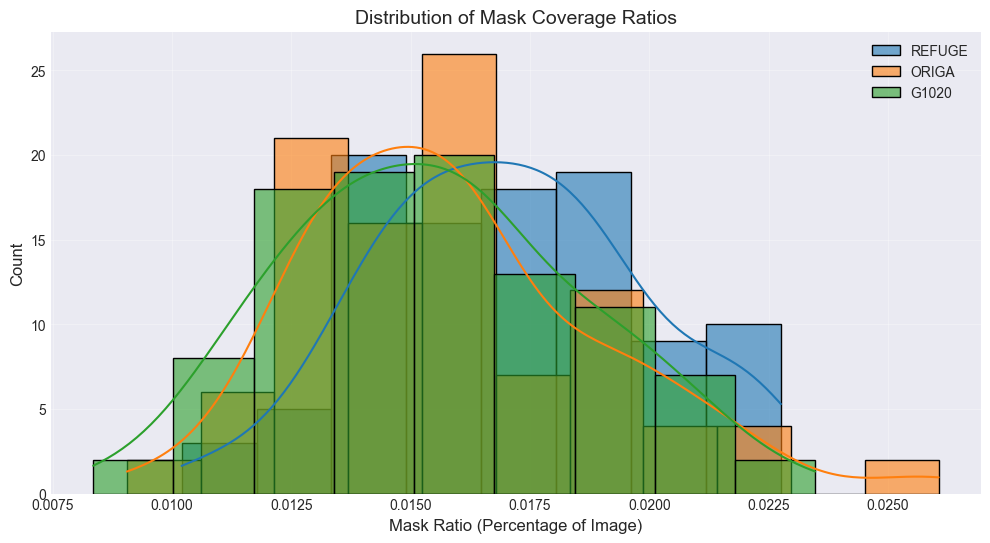

In [21]:
def analyze_mask_distribution(dataset_name, max_samples=100):
    """Analyze the mask distribution for a dataset."""
    if dataset_name not in dataset_stats:
        print(f"Dataset {dataset_name} not available")
        return {}
    
    stats = dataset_stats[dataset_name]
    mask_files = stats['mask_files']
    
    # Limit number of samples for speed
    num_samples = min(max_samples, len(mask_files))
    selected_masks = np.random.choice(mask_files, num_samples, replace=False)
    
    # Calculate mask statistics
    mask_sizes = []
    mask_ratios = []
    
    for mask_path in tqdm(selected_masks, desc=f"Analyzing {dataset_name} masks"):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            continue
            
        # Calculate mask percentage
        total_pixels = mask.shape[0] * mask.shape[1]
        mask_pixels = np.sum(mask > 0)
        mask_ratio = mask_pixels / total_pixels
        
        mask_sizes.append(mask_pixels)
        mask_ratios.append(mask_ratio)
    
    results = {
        'mask_sizes': mask_sizes,
        'mask_ratios': mask_ratios,
        'mean_size': np.mean(mask_sizes),
        'mean_ratio': np.mean(mask_ratios),
        'median_ratio': np.median(mask_ratios),
        'std_ratio': np.std(mask_ratios)
    }
    
    # Print statistics
    print(f"{dataset_name} Mask Statistics:")
    print(f" - Mean mask size: {results['mean_size']:.1f} pixels")
    print(f" - Mean mask ratio: {results['mean_ratio']:.4f} ({results['mean_ratio']*100:.2f}%)")
    print(f" - Median mask ratio: {results['median_ratio']:.4f} ({results['median_ratio']*100:.2f}%)")
    print(f" - Std dev mask ratio: {results['std_ratio']:.4f}")
    
    return results


# Analyze distributions for each dataset
mask_distributions = {}
for dataset_name in available_datasets:
    mask_distributions[dataset_name] = analyze_mask_distribution(dataset_name)

# Plot mask ratio distributions
plt.figure(figsize=(12, 6))

for dataset_name, results in mask_distributions.items():
    if 'mask_ratios' in results and len(results['mask_ratios']) > 0:
        sns.histplot(results['mask_ratios'], label=dataset_name, kde=True, alpha=0.6)

plt.title('Distribution of Mask Coverage Ratios', fontsize=14)
plt.xlabel('Mask Ratio (Percentage of Image)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Analyze Class Imbalance

Class Distribution:
 - Glaucoma pixels: 0.0162 (1.62%)
 - Background pixels: 0.9838 (98.38%)
 - Imbalance ratio: 1:60.9


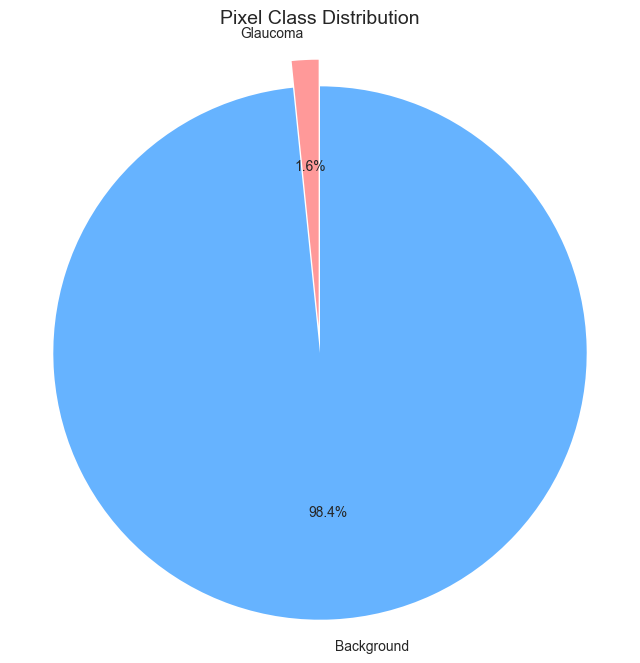

In [23]:
# Calculate class imbalance for all datasets combined
all_ratios = []
for dataset_name, results in mask_distributions.items():
    if 'mask_ratios' in results:
        all_ratios.extend(results['mask_ratios'])

average_ratio = np.mean(all_ratios) if all_ratios else 0
background_ratio = 1 - average_ratio

print(f"Class Distribution:")
print(f" - Glaucoma pixels: {average_ratio:.4f} ({average_ratio*100:.2f}%)")
print(f" - Background pixels: {background_ratio:.4f} ({background_ratio*100:.2f}%)")
print(f" - Imbalance ratio: 1:{background_ratio/average_ratio:.1f}")

# Plot class imbalance
plt.figure(figsize=(8, 8))
plt.pie([average_ratio, background_ratio], 
        labels=['Glaucoma', 'Background'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'],
        startangle=90,
        explode=(0.1, 0))
plt.title('Pixel Class Distribution', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## 6. Analyze Image Properties

In [25]:
def analyze_image_properties(dataset_name, max_samples=50):
    """Analyze image properties for a dataset."""
    if dataset_name not in dataset_stats:
        print(f"Dataset {dataset_name} not available")
        return {}
    
    stats = dataset_stats[dataset_name]
    image_files = stats['image_files']
    
    # Limit number of samples for speed
    num_samples = min(max_samples, len(image_files))
    selected_images = np.random.choice(image_files, num_samples, replace=False)
    
    # Calculate image statistics
    image_sizes = []
    image_channels = []
    image_means = []
    image_stds = []
    
    for img_path in tqdm(selected_images, desc=f"Analyzing {dataset_name} images"):
        img = cv2.imread(img_path)
        if img is None:
            continue
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Record properties
        image_sizes.append(img.shape[:2])  # Height, width
        image_channels.append(img.shape[2] if len(img.shape) > 2 else 1)
        
        # Calculate mean and std per channel
        img_float = img.astype(np.float32) / 255.0
        mean_per_channel = [np.mean(img_float[:, :, c]) for c in range(img.shape[2])]
        std_per_channel = [np.std(img_float[:, :, c]) for c in range(img.shape[2])]
        
        image_means.append(mean_per_channel)
        image_stds.append(std_per_channel)
    
    # Calculate average mean and std across all images
    avg_mean = np.mean(image_means, axis=0) if image_means else [0, 0, 0]
    avg_std = np.mean(image_stds, axis=0) if image_stds else [0, 0, 0]
    
    results = {
        'image_sizes': image_sizes,
        'image_channels': image_channels,
        'avg_mean': avg_mean,
        'avg_std': avg_std,
    }
    
    # Print statistics
    print(f"{dataset_name} Image Properties:")
    print(f" - Image dimensions: {image_sizes[0] if image_sizes else 'Unknown'}")
    print(f" - Number of channels: {image_channels[0] if image_channels else 'Unknown'}")
    print(f" - Mean RGB values: [{avg_mean[0]:.4f}, {avg_mean[1]:.4f}, {avg_mean[2]:.4f}]")
    print(f" - Std dev RGB values: [{avg_std[0]:.4f}, {avg_std[1]:.4f}, {avg_std[2]:.4f}]")
    
    return results

# Analyze image properties for each dataset
image_properties = {}
for dataset_name in available_datasets:
    image_properties[dataset_name] = analyze_image_properties(dataset_name)

Analyzing REFUGE images:   0%|          | 0/50 [00:00<?, ?it/s]

REFUGE Image Properties:
 - Image dimensions: (1634, 1634)
 - Number of channels: 3
 - Mean RGB values: [0.3690, 0.2437, 0.1808]
 - Std dev RGB values: [0.2485, 0.1700, 0.1257]


Analyzing ORIGA images:   0%|          | 0/50 [00:00<?, ?it/s]

ORIGA Image Properties:
 - Image dimensions: (512, 512)
 - Number of channels: 3
 - Mean RGB values: [0.4579, 0.2875, 0.1284]
 - Std dev RGB values: [0.3125, 0.1958, 0.0952]


Analyzing G1020 images:   0%|          | 0/50 [00:00<?, ?it/s]

G1020 Image Properties:
 - Image dimensions: (512, 512)
 - Number of channels: 3
 - Mean RGB values: [0.5672, 0.2553, 0.1173]
 - Std dev RGB values: [0.3816, 0.1821, 0.0843]


## 7. Recommendations for Training

Based on the data analysis, here are some key observations and recommendations:

In [27]:
# Calculate average RGB values and standard deviations across all datasets
all_means = []
all_stds = []

for dataset_name, props in image_properties.items():
    if 'avg_mean' in props:
        all_means.append(props['avg_mean'])
    if 'avg_std' in props:
        all_stds.append(props['avg_std'])

overall_mean = np.mean(all_means, axis=0) if all_means else [0, 0, 0]
overall_std = np.mean(all_stds, axis=0) if all_stds else [0, 0, 0]

print("Dataset Summary:")
print(f" - Total number of images: {summary_df.iloc[-1]['Images']}")
print(f" - Total number of masks: {summary_df.iloc[-1]['Masks']}")
print(f" - Average RGB mean: [{overall_mean[0]:.4f}, {overall_mean[1]:.4f}, {overall_mean[2]:.4f}]")
print(f" - Average RGB std: [{overall_std[0]:.4f}, {overall_std[1]:.4f}, {overall_std[2]:.4f}]")
print(f" - Class imbalance ratio: 1:{background_ratio/average_ratio:.1f}")

# Recommendations
print("\nRecommendations for Training:")
print(f" 1. Use focal loss to handle class imbalance (ratio 1:{background_ratio/average_ratio:.1f})")
print(f" 2. Apply data augmentation to increase training set diversity")
print(f" 3. Use RGB normalization with mean=[{overall_mean[0]:.4f}, {overall_mean[1]:.4f}, {overall_mean[2]:.4f}], std=[{overall_std[0]:.4f}, {overall_std[1]:.4f}, {overall_std[2]:.4f}]")
print(f" 4. Set appropriate focal loss parameters (alpha={average_ratio:.4f}, gamma=2.0)")
print(f" 5. Consider using the Combined loss with dice_weight=1.0, focal_weight=1.0")

Dataset Summary:
 - Total number of images: 2870
 - Total number of masks: 2870
 - Average RGB mean: [0.4647, 0.2622, 0.1422]
 - Average RGB std: [0.3142, 0.1826, 0.1017]
 - Class imbalance ratio: 1:60.9

Recommendations for Training:
 1. Use focal loss to handle class imbalance (ratio 1:60.9)
 2. Apply data augmentation to increase training set diversity
 3. Use RGB normalization with mean=[0.4647, 0.2622, 0.1422], std=[0.3142, 0.1826, 0.1017]
 4. Set appropriate focal loss parameters (alpha=0.0162, gamma=2.0)
 5. Consider using the Combined loss with dice_weight=1.0, focal_weight=1.0


## Summary

In this notebook, we've explored the glaucoma detection datasets, analyzing their characteristics and identifying key considerations for training our models.

Key findings:
- The datasets contain square images suitable for deep learning models
- There is significant class imbalance between glaucoma and background pixels
- We've calculated mean and standard deviation values for proper normalization
- Using focal loss or a combined loss function is recommended to address class imbalance